In [1716]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
from sklearn import metrics

import warnings
with warnings.catch_warnings():
    warnings.filterwarnings("ignore",category=DeprecationWarning)

In [1717]:
# Read csv into Pandas dataframe
movies_dataframe = pd.read_csv('movie_metadata.csv')
movies_dataframe.head(12)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000


In [1718]:
movies_dataframe.shape

(5043, 28)

<dl>
    <dt><h3>Treating our Dataset</h3></dt>
    <dd><em>The first step in treating our dataset is to remove all movies made outside the USA.<br /><br />
    After looking inside of the dataset many empty fields were present.  To solve this issue any block with missing information was to be set to 0.<br /><br />
    Finally, to fix an issue that would later appear, all samples with the "Color" feature set to 0, meaning that the field was empty, is to be dropped.
    </em></dd>
</dl>

In [1719]:
movies_dataframe = movies_dataframe.drop(movies_dataframe[movies_dataframe.country != 'USA'].index)
movies_dataframe = movies_dataframe.fillna(0)
movies_dataframe = movies_dataframe.drop(movies_dataframe[movies_dataframe.color == 0].index)

movies_dataframe.head(12)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
10,Color,Zack Snyder,673.0,183.0,0.0,2000.0,Lauren Cohan,15000.0,330249062.0,Action|Adventure|Sci-Fi,...,3018.0,English,USA,PG-13,250000000.0,2016.0,4000.0,6.9,2.35,197000
11,Color,Bryan Singer,434.0,169.0,0.0,903.0,Marlon Brando,18000.0,200069408.0,Action|Adventure|Sci-Fi,...,2367.0,English,USA,PG-13,209000000.0,2006.0,10000.0,6.1,2.35,0
13,Color,Gore Verbinski,313.0,151.0,563.0,1000.0,Orlando Bloom,40000.0,423032628.0,Action|Adventure|Fantasy,...,1832.0,English,USA,PG-13,225000000.0,2006.0,5000.0,7.3,2.35,5000


In [1720]:
movies_dataframe.shape

(3793, 28)

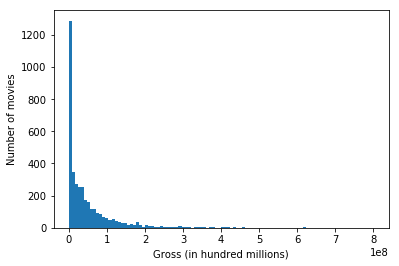

gross    760505847.0
dtype: float64


In [1721]:
%matplotlib inline
plt.hist(movies_dataframe['gross'], bins=100, normed=False, range=(0, 800000000))

plt.xlabel('Gross (in hundred millions)')
plt.ylabel('Number of movies')
plt.show()

# We also want to see what the maximum grossing movie in our dataset is
max_gross = movies_dataframe[['gross']].max()
print(max_gross)

### Gross

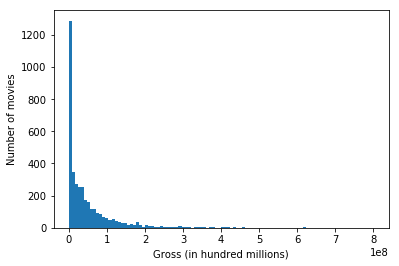

gross    760505847.0
dtype: float64


In [1722]:
# Pyplot gross in a histogram
%matplotlib inline
plt.hist(movies_dataframe['gross'], bins=100, normed=False, range=(0, 800000000))

plt.xlabel('Gross (in hundred millions)')
plt.ylabel('Number of movies')
plt.show()

# We also want to see what the maximum grossing movie in our dataset is
max_gross = movies_dataframe[['gross']].max()
print(max_gross)

<dl>
    <dt><h3>Summary:<br /></h3></dt>
    <dd>The vast majority of samples grossed sub-100 million.  Very few outliers beyond the 200 million dollar mark.  For this reason we will keep them in the dataset. <br /><br />
    We will also use our maximum gross number for limits
    </dd>
</dl>

<dl>
    <dt><h3>Movie Info</h3></dt>
    <dd><em>IMDB Score, Budget, Duration, Title Year</em></dd>
</dl>

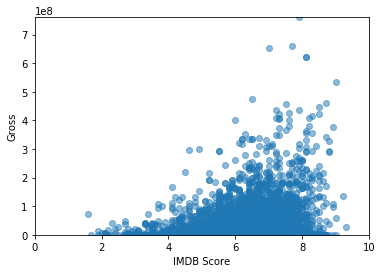

In [1723]:
# Gross vs. IMDB Score

x_axis = movies_dataframe[['imdb_score']]
y = movies_dataframe[['gross']]

%matplotlib inline
plt.ylabel('Gross')
plt.xlabel('IMDB Score')

plt.ylim([0, 760505847])            #Gross limit of $760505847
plt.xlim([0, 10])                   #IMDB score range from 0 - 10
plt.scatter(x_axis, y, alpha=0.5)
plt.show()

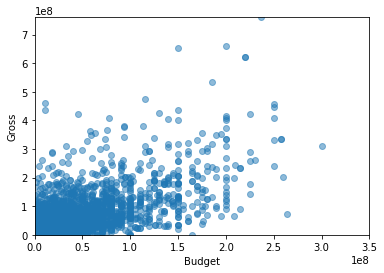

In [1724]:
# Gross vs. Budget

x_axis = movies_dataframe[['budget']]

plt.ylabel('Gross')
plt.xlabel('Budget')

plt.ylim([0, 760505847])            #Gross limit of $760505847
plt.xlim([0, 350000000])            #Budget limit of $350M
plt.scatter(x_axis, y, alpha=0.5)
plt.show()

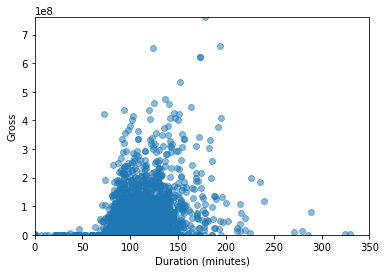

In [1725]:
# Gross vs. Duration

x_axis = movies_dataframe[['duration']]

plt.ylabel('Gross')
plt.xlabel('Duration (minutes)')

plt.ylim([0, 760505847])            #Gross limit of $760505847
plt.xlim([0, 350])                  #Durtaion limit of 350 minutes (looong movies)
plt.scatter(x_axis, y, alpha=0.5)
plt.show()

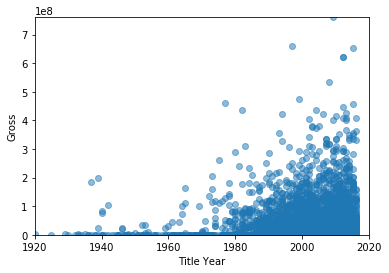

In [1726]:
# Gross vs. Title Year

x_axis = movies_dataframe[['title_year']]

plt.ylabel('Gross')
plt.xlabel('Title Year')

plt.ylim([0, 760505847])            #Gross limit of $760505847
plt.xlim([1920, 2020])              #Title Year range of 1920 - 2020
plt.scatter(x_axis, y, alpha=0.5)
plt.show()

<dl>
    <dt><h3>Summary:<br /></h3></dt>
    <dd>Patterns that correlate with a movie's gross can clearly be seen with IMDB score, budget, and duration.  IMDB Score shows a relative rise in gross as a movie's rating increases to a point.  Budget and duration show that most movies follow a standard format.
    <br /><br />
    Title Year should be evaluated with a bit of scrutiny.  The vast majority of samples occur after the year 1980.  Gross values have also not been adjusted for inflation which would also explain for such a sharp rise in earnings for movies.
    <br /><br />
    To adjust for this we will consider movies before 1980 to be outliers and remove them from the dataset.  This fits within the scope of this project as recent movies will have the largest impact.  This will be our new dataset.</dd>
</dl>

In [1727]:
# Drop samples with Title Year before 1980
movies_dataframe = movies_dataframe.drop(movies_dataframe[movies_dataframe.title_year < 1980].index)

movies_dataframe.head(12)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
10,Color,Zack Snyder,673.0,183.0,0.0,2000.0,Lauren Cohan,15000.0,330249062.0,Action|Adventure|Sci-Fi,...,3018.0,English,USA,PG-13,250000000.0,2016.0,4000.0,6.9,2.35,197000
11,Color,Bryan Singer,434.0,169.0,0.0,903.0,Marlon Brando,18000.0,200069408.0,Action|Adventure|Sci-Fi,...,2367.0,English,USA,PG-13,209000000.0,2006.0,10000.0,6.1,2.35,0
13,Color,Gore Verbinski,313.0,151.0,563.0,1000.0,Orlando Bloom,40000.0,423032628.0,Action|Adventure|Fantasy,...,1832.0,English,USA,PG-13,225000000.0,2006.0,5000.0,7.3,2.35,5000


In [1728]:
# Checking new dataframe size for change.  OLD: (2999, 17)
movies_dataframe.shape

(3517, 28)

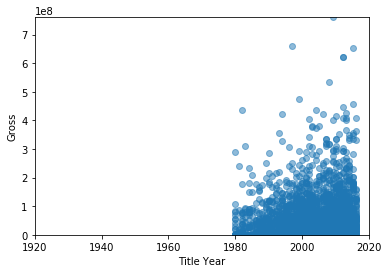

In [1729]:
# Gross vs. Title Year (Revised)

x_axis = movies_dataframe[['title_year']]
y = movies_dataframe[['gross']]
%matplotlib inline

plt.ylabel('Gross')
plt.xlabel('Title Year')

plt.ylim([0, 760505847])            #Gross limit of $760505847
plt.xlim([1920, 2020])              #Title Year range of 1920 - 2020 to show change
plt.scatter(x_axis, y, alpha=0.5)
plt.show()

<dl>
    <dt><h3>Ratings Info</h3></dt>
    <dd><em>Number of Critic Reviews, User Reviews, Voted Users</em></dd>
</dl>

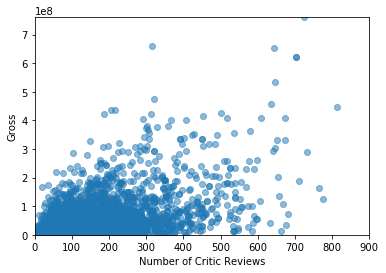

In [1730]:
# Gross vs. Number of Critic Reviews

x_axis = movies_dataframe[['num_critic_for_reviews']]

plt.ylabel('Gross')
plt.xlabel('Number of Critic Reviews')

plt.ylim([0, 760505847])            #Gross limit of $760505847
plt.xlim([0, 900])                  #Number of Critic Reviews limit of 900
plt.scatter(x_axis, y, alpha=0.5)
plt.show()

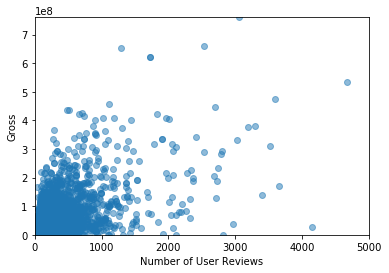

In [1731]:
# Gross vs. Number of User Reviews

x_axis = movies_dataframe[['num_user_for_reviews']]

plt.ylabel('Gross')
plt.xlabel('Number of User Reviews')

plt.ylim([0, 760505847])            #Gross limit of $760505847
plt.xlim([0, 5000])                 #Number of User Reviews limit of 5000
plt.scatter(x_axis, y, alpha=0.5)
plt.show()

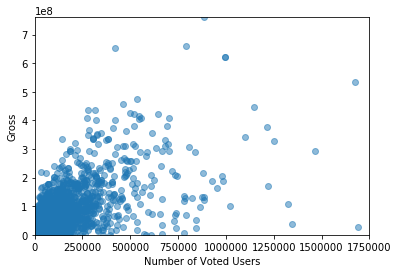

In [1732]:
# Gross vs. Number of Voted Users

x_axis = movies_dataframe[['num_voted_users']]

plt.ylabel('Gross')
plt.xlabel('Number of Voted Users')

plt.ylim([0, 760505847])            #Gross limit of $760505847
plt.xlim([0, 1750000])              #Number of Vote Users limit of 1.75M
plt.scatter(x_axis, y, alpha=0.5)
plt.locator_params(axis='x', nbins=7)
plt.show()

<dl>
    <dt><h3>Summary:<br /></h3></dt>
    <dd>All three ratings features present valuable information.<br /><br />
    
    </dd>
</dl>

<dl>
    <dt><h3>Miscellaneous</h3></dt>
    <dd><em>Face Number in Poster, Color</em></dd>
</dl>

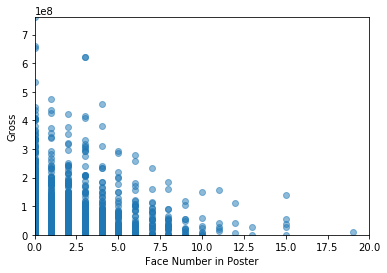

In [1733]:
# Gross vs. Face Number in Poster

x_axis = movies_dataframe[['facenumber_in_poster']]

plt.ylabel('Gross')
plt.xlabel('Face Number in Poster')

plt.ylim([0, 760505847])            #Gross limit of $760505847
plt.xlim([0, 20])                   #Faces in poster limit of 20
plt.scatter(x_axis, y, alpha=0.5)
plt.show()

In [1734]:
# Function to convert color values to binary values
def color_to_numeric(x):
    if x == 'Color':
        return 1;
    else:
        return 0;
    
# Creates a new feature named ColorLabel using converted values
movies_dataframe['ColorLabel'] = movies_dataframe['color'].apply(color_to_numeric)
movies_dataframe.head(12)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,ColorLabel
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,1
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,1
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,1
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,1
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0,1
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000,1
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000,1
10,Color,Zack Snyder,673.0,183.0,0.0,2000.0,Lauren Cohan,15000.0,330249062.0,Action|Adventure|Sci-Fi,...,English,USA,PG-13,250000000.0,2016.0,4000.0,6.9,2.35,197000,1
11,Color,Bryan Singer,434.0,169.0,0.0,903.0,Marlon Brando,18000.0,200069408.0,Action|Adventure|Sci-Fi,...,English,USA,PG-13,209000000.0,2006.0,10000.0,6.1,2.35,0,1
13,Color,Gore Verbinski,313.0,151.0,563.0,1000.0,Orlando Bloom,40000.0,423032628.0,Action|Adventure|Fantasy,...,English,USA,PG-13,225000000.0,2006.0,5000.0,7.3,2.35,5000,1


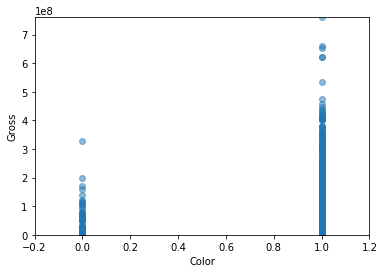

In [1735]:
# Gross vs. Color

x_axis = movies_dataframe[['ColorLabel']]

plt.ylabel('Gross')
plt.xlabel('Color')

plt.ylim([0, 760505847])            #Gross limit of $760505847
plt.xlim([-0.2,1.2])                # ColorLabel range -0.2 - 1.2 for clarity with binary values
plt.scatter(x_axis, y, alpha=0.5)
plt.show()

<dl>
    <dt><h3>Summary:<br /></h3></dt>
    <dd>Facenumber in Poster is surprisingly informative.  It shows that the number of faces in a movie poster correlates negatively with a movie's gross.  Movies with 0 faces tend to do much better than movies with even just 1 face and linearly decreases as more faces are added.
    <br /><br />
    Color's results are expected.  Almost all recent movies are color, but there are a fair amount of samples for black and white movies and many that did well.
    </dd>
</dl>

<dl>
    <dt><h3>Facebook Info</h3></dt>
    <dd><em>Movie Facebook Likes, Cast Total Facebook Likes, Director Facebook Likes</em></dd>
</dl>

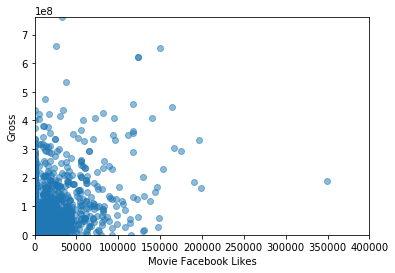

In [1736]:
# Gross vs. Movie Facebook Likes

x_axis = movies_dataframe[['movie_facebook_likes']]

plt.ylabel('Gross')
plt.xlabel('Movie Facebook Likes')

plt.ylim([0, 760505847])            #Gross limit of $760505847
plt.xlim([0, 400000])               #Movie Facebook Like limit of 400,000
plt.scatter(x_axis, y, alpha=0.5)
plt.show()

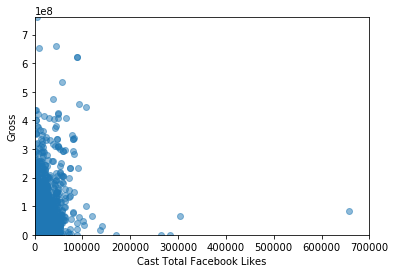

In [1737]:
# Gross vs. Cast Total Facebook Likes

x_axis = movies_dataframe[['cast_total_facebook_likes']]

plt.ylabel('Gross')
plt.xlabel('Cast Total Facebook Likes')

plt.ylim([0, 760505847])            #Gross limit of $760505847
plt.xlim([0, 700000])               #Cast Facebook Like limit of 700,000
plt.scatter(x_axis, y, alpha=0.5)
plt.show()

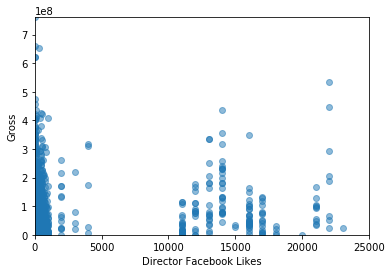

In [1738]:
# Gross vs. Director Facebook Likes

x_axis = movies_dataframe[['director_facebook_likes']]

plt.ylabel('Gross')
plt.xlabel('Director Facebook Likes')

plt.ylim([0, 760505847])            #Gross limit of $760505847
plt.xlim([0, 25000])                #Director Facebook Likes limit of 25000 (no love for the directors)
plt.scatter(x_axis, y, alpha=0.5)
plt.show()

<dl>
    <dt><h3>Summary:<br /></h3></dt>
    <dd>Facebook's influence on a movie's gross can only be calculated on movies made after facebook's creation and rise in popularity.  To include facebook's data in our dataset we would need to eliminate many movies from the dataset.  It is for this reason any of the facebook features will not be included.
    <br /><br />
    Nevertheless, it is still interesting to see what the pyplots show for the data. <br  />
    The movie's total facebook likes seems to be the most informative of the three.  Movies with over 50,000 likes do not necessarily gross more.
    </dd>
</dl>

### Normalization of feature matrix

In [1739]:
feature_scaled = movies_dataframe[['imdb_score', 'budget', 'duration', 'title_year', 'num_critic_for_reviews', 'num_user_for_reviews', 'num_voted_users', 'facenumber_in_poster', 'ColorLabel']]
feature_scaled = feature_scaled.apply(lambda x: ((x - x.min()) / (x.max() - x.min())))

feature_scaled.head()

,imdb_score,budget,duration,title_year,num_critic_for_reviews,num_user_for_reviews,num_voted_users,facenumber_in_poster,ColorLabel
0,0.818182,0.790000,0.539394,0.805556,0.889299,0.654382,0.524453,0.000000,1.0
1,0.714286,1.000000,0.512121,0.750000,0.371464,0.265267,0.278865,0.000000,1.0
3,0.896104,0.833333,0.496970,0.888889,1.000000,0.578744,0.677216,0.000000,1.0
5,0.649351,0.879000,0.400000,0.888889,0.568266,0.158132,0.125579,0.023256,1.0
6,0.597403,0.860000,0.472727,0.750000,0.482165,0.407542,0.226690,0.000000,1.0


### Splitting the dataset

In [1740]:
X_train, X_test, y_train, y_test = train_test_split(feature_scaled, y, random_state=2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2637, 9)
(2637, 1)
(880, 9)
(880, 1)


### Linear Regression

In [1741]:
linReg = LinearRegression()
linReg.fit(X_train, y_train)

print(linReg.intercept_)
print('')
print(linReg.coef_)

[ 8654399.82902414]

[[  3.36477072e+06   2.35537138e+08  -3.72915573e+07  -1.82640721e+07
    1.53425197e+07   3.35471601e+07   2.80126609e+08   2.08708322e+07
    1.41562616e+07]]


In [1742]:
testing_set_prediction = linReg.predict(X_test)

# Calculate the mean square error of testing
mse = metrics.mean_squared_error(y_test, testing_set_prediction)

# Calculate the root mean square error of testing
rmse = np.sqrt(mse)
print("RMSE: ", rmse)

RMSE:  44783592.7342


### 10-Fold Cross Validation

In [1743]:
mse_list = cross_val_score(linReg, feature_scaled, y, cv = 10, scoring='neg_mean_squared_error')

print(mse_list)

[ -7.03122281e+15  -3.76339488e+15  -1.70585782e+15  -1.37902645e+15
  -1.89880194e+15  -1.14177380e+15  -1.15521573e+15  -8.71745863e+14
  -3.45854271e+14  -1.41721036e+14]


In [1744]:
# Next we must remove negative numbers to calculate rmse
mse_list_pos = -mse_list              # Create a copy of negated values
rmse_list = np.sqrt(mse_list_pos)     # Sqrt the copy

print(rmse_list)

[ 83852387.00665019  61346514.80368376  41302031.66287243
  37135245.34695198  43575244.59780504  33790143.48587294
  33988464.61070091  29525342.72168111  18597157.6023379   11904664.46869294]


In [1745]:
# Print out our average RMSE and average error
print('Average rmse: ', rmse_list.mean())
print('Average error: ', rmse_list.mean()/760505847) # Divide by range of 760505847

Average rmse:  39501719.6307
Average error:  0.0519413753182
